In [54]:
# import the libraries
import pandas as pd
import seaborn as sns

In [55]:
# get the data
movie_df = pd.read_csv('moviereviews.tsv', sep='\t')
movie_df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


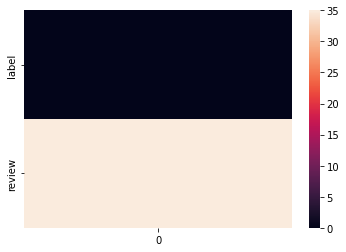

In [56]:
# let's check if there are any missing values ()
sns.heatmap(pd.DataFrame(movie_df.isnull().sum())) # 35 review data are missing

In [57]:
# I can both drop and replace them but I prefer replace missing values with " " (but I also train my model with drop out the null values)
movie_df_string = movie_df.fillna(" ")

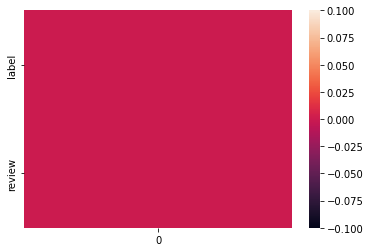

In [58]:
sns.heatmap(pd.DataFrame(movie_df_string.isnull().sum()))  # no more null value in the dataset

In [59]:
# determine the feature and the value that will be predicted
X = movie_df_string['review']
y = movie_df_string['label']

In [60]:
# split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, test_size=0.33)

In [61]:
# we have to use review data to predict the label but first I have to convert the raw text messages
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

pipe = Pipeline([('tfidf', TfidfVectorizer()), ('model', LinearSVC())])

In [62]:
# train the model
pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('model', LinearSVC())])

In [63]:
# make predictions
preds = pipe.predict(X_test)

In [64]:
# compare the results
from sklearn.metrics import classification_report, accuracy_score

print("Classification report: ", classification_report(y_test, preds))

Classification report:                precision    recall  f1-score   support

         neg       0.83      0.86      0.84       328
         pos       0.85      0.83      0.84       332

    accuracy                           0.84       660
   macro avg       0.84      0.84      0.84       660
weighted avg       0.84      0.84      0.84       660



In [65]:
print("Accuracy Score: ", accuracy_score(y_test, preds))

Accuracy Score:  0.8424242424242424


In [66]:
# model has .83 accuracy score so it's not successful but we can try the model with new data 
pipe.predict(['The film, Norma Rae (1979), presents the story of a woman during an American labor movement where labor was depicted to be too intricate and prosperous to care for the underprivileged. The labor movement portrayed in the movie is perceived to be extremely powerful, powerful to the extent that its interests are always met. The movie is set in the present day (1979) rural south with the protagonist Norma Rae, a Southern mill worker with two children. The film provides a significant evaluation of the radicalism that was portrayed in the post-1960s by southern managers and how they learned to oppress the unprivileged when they were able to resist their legal rights.'])

array(['pos'], dtype=object)

In [67]:
# now let's drop the null values and see if the accuracy score changes
movie_df.isnull().sum()

label      0
review    35
dtype: int64

In [68]:
# drop na 
movie_df.dropna(inplace=True)
movie_df.isnull().sum()

label     0
review    0
dtype: int64

In [74]:
# determine the feature and the value that will be predicted
X = movie_df['review']
y = movie_df['label']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, test_size=0.33)

In [75]:
# train the model
pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('model', LinearSVC())])

In [76]:
# make predictions
preds = pipe.predict(X_test)

In [77]:
# compare the results
print("Classification report: ", classification_report(y_test, preds))

Classification report:                precision    recall  f1-score   support

         neg       0.85      0.84      0.84       329
         pos       0.84      0.84      0.84       320

    accuracy                           0.84       649
   macro avg       0.84      0.84      0.84       649
weighted avg       0.84      0.84      0.84       649



In [78]:
print("Accuracy Score: ", accuracy_score(y_test, preds))

Accuracy Score:  0.8412942989214176


The model that I trained without the null values is slightly more accurate but there is approximately .02 gap between them. 